## seaborn 是 Python 中基于 matplotlib 的具有更多可视化功能和更优美绘图风格的绘图模块，当我们想要探索单个或一对数据分布上的特征时，可以使用到 seaborn 中内置的若干函数对数据的分布进行多种多样的可视化。



# kdeplot
- seaborn 中的 kdeplot 可用于对单变量和双变量进行核密度估计并可视化，其主要参数如下：

- data：一维数组，单变量时作为唯一的变量

- data2：格式同 data2，单变量时不输入，双变量作为第 2 个输入变量

- shade：bool 型变量，用于控制是否对核密度估计曲线下的面积进行色彩填充，True 代表填充

- vertical：bool 型变量，在单变量输入时有效，用于控制是否颠倒 x-y 轴位置

- kernel：字符型输入，用于控制核密度估计的方法，默认为'gau'，即高斯核，特别地在 2 维变量的情况下仅支持高斯核方法

- legend：bool 型变量，用于控制是否在图像上添加图例

- cumulative：bool 型变量，用于控制是否绘制核密度估计的累计分布，默认为 False

- shade_lowest：bool 型变量，用于控制是否为核密度估计中最低的范围着色，主要用于在同一个坐标轴中比较多个不同分布总体，默认为 True

- cbar：bool 型变量，用于控制是否在绘制二维核密度估计图时在图像右侧边添加比色卡

- color：字符型变量，用于控制核密度曲线色彩，同 plt.plot() 中的 color 参数，如'r'代表红色

- cmap：字符型变量，用于控制核密度区域的递进色彩方案，同 plt.plot() 中的 cmap 参数，如'Blues'代表蓝色系

- n_levels：int 型，在而为变量时有效，用于控制核密度估计的区间个数，反映在图像上的闭环层数

In [3]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
#加载seaborn自带的鸢尾花数据集，格式为数据框
iris=sns.load_dataset('iris')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
#分离出setosa类的花对应的属性值
setosa=iris.loc[iris.species=="setosa"].reset_index(drop=True)
#分离出virginica类的花对应的属性值
virginica=iris.loc[iris.species=="virginica"].reset_index(drop=True)
setosa,virginica

(    sepal_length  sepal_width  petal_length  petal_width species
 0            5.1          3.5           1.4          0.2  setosa
 1            4.9          3.0           1.4          0.2  setosa
 2            4.7          3.2           1.3          0.2  setosa
 3            4.6          3.1           1.5          0.2  setosa
 4            5.0          3.6           1.4          0.2  setosa
 5            5.4          3.9           1.7          0.4  setosa
 6            4.6          3.4           1.4          0.3  setosa
 7            5.0          3.4           1.5          0.2  setosa
 8            4.4          2.9           1.4          0.2  setosa
 9            4.9          3.1           1.5          0.1  setosa
 10           5.4          3.7           1.5          0.2  setosa
 11           4.8          3.4           1.6          0.2  setosa
 12           4.8          3.0           1.4          0.1  setosa
 13           4.3          3.0           1.1          0.1  setosa
 14       

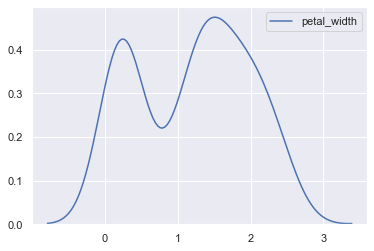

In [15]:
ax=sns.kdeplot(iris.petal_width)

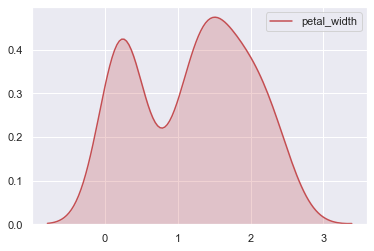

In [17]:
#加上红色填充颜色
ax=sns.kdeplot(iris.petal_width,shade=True,color='r')

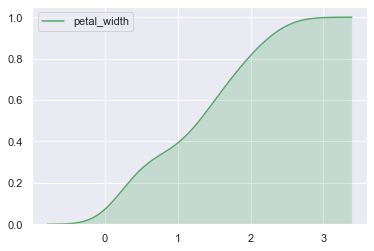

In [18]:
#修改为核密度分布
ax=sns.kdeplot(iris.petal_width,
              shade=True,
              color='g',
              cumulative=True)

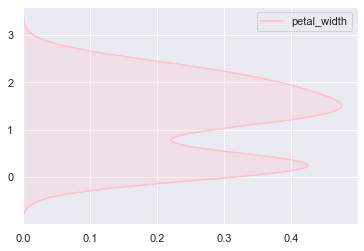

In [22]:
# 交换x-y轴位置
ax=sns.kdeplot(
    iris.petal_width,
    shade=True,
    color='pink',
    vertical=True
)

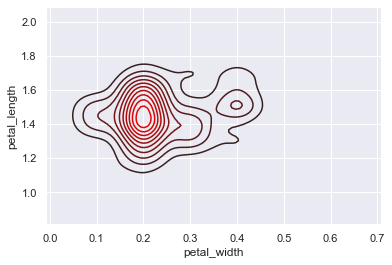

In [27]:
#绘制setosa花的petal_width与petal_length的联合核密度估计图
ax=sns.kdeplot(setosa.petal_width,
              setosa.petal_length,
              color="red")

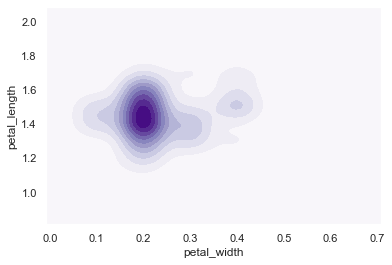

In [37]:
# 修改调色方案为蓝色，并设置shade_lowest=True：
ax=sns.kdeplot(setosa.petal_width,
              setosa.petal_length,
              cmap='Purples',#可以变换总体的颜色
              shade=True,
              shade_lowest=True)
# 可以看到这时最低密度估计曲线之外的区域没有被调色方案所浸染。

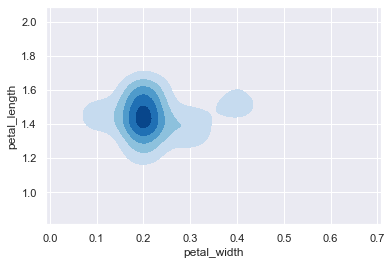

In [38]:
ax=sns.kdeplot(setosa.petal_width,
              setosa.petal_length,
              cmap='Blues',
              shade=True,
              shade_lowest=False,
              n_levels=5)

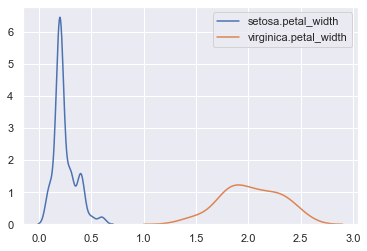

In [40]:
# 在同一个子图中绘制两个不同一维总体的核密度估计图，这里为了把它们区分开分别定义了label参数以显示在图例中
ax1 = sns.kdeplot(setosa.petal_width,label='setosa.petal_width')
ax2 = sns.kdeplot(virginica.petal_width,label='virginica.petal_width')

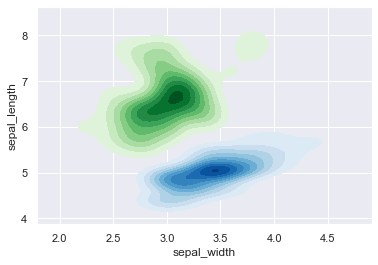

In [42]:
# 在同一个子图中绘制两个不同二维总体的核密度估计图
ax1 = sns.kdeplot(setosa.sepal_width,setosa.sepal_length,
                  cmap='Blues',
                  shade=True,
                  shade_lowest=False)
ax2 = sns.kdeplot(virginica.sepal_width,virginica.sepal_length,
                  cmap='Greens',
                  shade=True,
                  shade_lowest=False)

# rugplot

#### rugplot的功能非常朴素，用于绘制出一维数组中数据点实际的分布位置情况，即不添加任何数学意义上的拟合，单纯的将记录值在坐标轴上表现出来，相对于kdeplot，其可以展示原始的数据离散分布情况，其主要参数如下：

- a：一维数组，传入观测值向量

- height：设置每个观测点对应的小短条的高度，默认为0.05

- axis：字符型变量，观测值对应小短条所在的轴，默认为'x'，即x轴

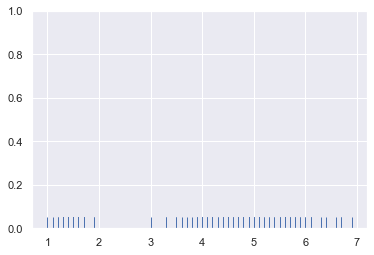

In [43]:
ax=sns.rugplot(iris.petal_length)

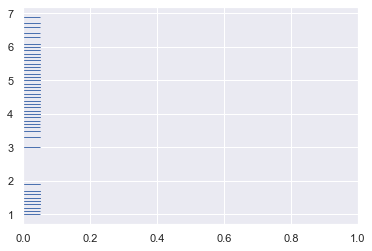

In [44]:
# 调换所处的坐标轴
ax = sns.rugplot(iris.petal_length,axis='y')

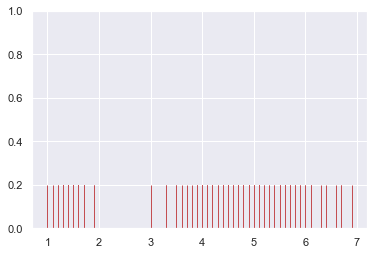

In [45]:
# 修改小短条高度和颜色
ax = sns.rugplot(iris.petal_length,
                 color='r',
                 height=0.2)

# distplot

#### seaborn中的distplot主要功能是绘制单变量的直方图，且还可以在直方图的基础上施加kdeplot和rugplot的部分内容，是一个功能非常强大且实用的函数，其主要参数如下：

- a：一维数组形式，传入待分析的单个变量

- bins：int型变量，用于确定直方图中显示直方的数量，默认为None，这时bins的具体个数由Freedman-Diaconis准则来确定

- hist：bool型变量，控制是否绘制直方图，默认为True

- kde：bool型变量，控制是否绘制核密度估计曲线，默认为True

- rug：bool型变量，控制是否绘制对应rugplot的部分，默认为False

- fit：传入scipy.stats中的分布类型，用于在观察变量上抽取相关统计特征来强行拟合指定的分布，下文的例子中会有具体说明，默认为None，即不进行拟合

- hist_kws,kde_kws,rug_kws：这几个变量都接受字典形式的输入，键值对分别对应各自原生函数中的参数名称与参数值，在下文中会有示例

- color：用于控制除了fit部分拟合出的曲线之外的所有对象的色彩

- vertical：bool型，控制是否颠倒x-y轴，默认为False，即不颠倒

- norm_hist：bool型变量，用于控制直方图高度代表的意义，为True直方图高度表示对应的密度，为False时代表的是对应的直方区间内记录值个数，默认为False

- label：控制图像中的图例标签显示内容

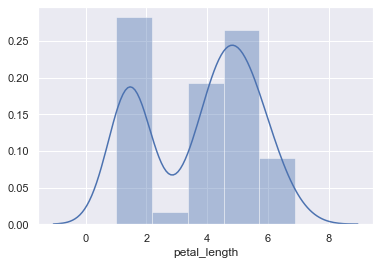

In [46]:
ax=sns.distplot(iris.petal_length)

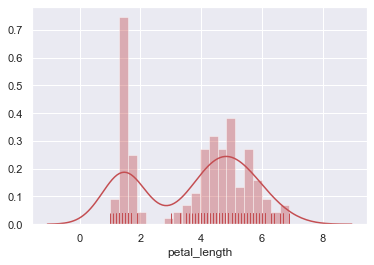

In [47]:
# 修改所有对象的颜色，绘制rugplot部分，并修改bins为20
ax = sns.distplot(iris.petal_length,color='r',
                 rug=True,
                 bins=20)

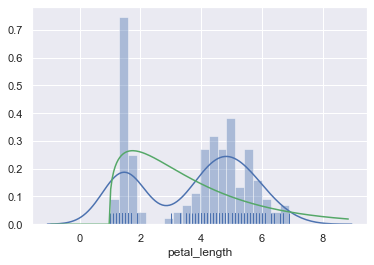

In [48]:
from scipy.stats import chi2
ax=sns.distplot(iris.petal_length,
               color='b',
               rug=True,
               bins=20,
               fit=chi2,
               fit_kws={'color':'g'})

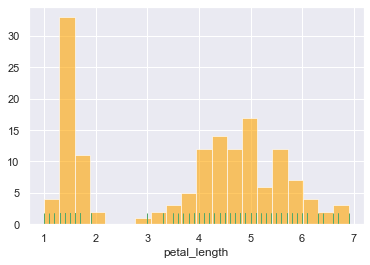

In [49]:
# 修改norm_hist参数为False使得纵轴显示的不再是密度而是频数（注意这里必须关闭kde和fit绘图的部分，否则纵轴依然显示密度），利用hist_kws传入字典调整直方图部分色彩和透明度，利用rug_kws传入字典调整rugplot部分小短条色彩：
ax = sns.distplot(iris.petal_length,color='r',
                 rug=True,
                 kde=False,
                 bins=20,
                 fit=None,
                 hist_kws={'alpha':0.6,'color':'orange'},
                 rug_kws={'color':'g'},
                 norm_hist=False)

# jointplot

#### 之所以按照kdeplot-rugplot-distplot的顺序来介绍是因为distplot中涉及到kdeplot与rugplot中的相关内容，而本文最后要介绍的函数jointplot中聚合了前面所涉及到的众多内容，用于对成对变量的相关情况、联合分布以及各自的分布在一张图上集中呈现，其主要参数如下：

- x,y：代表待分析的成对变量，有两种模式，第一种模式：在参数data传入数据框时，x、y均传入字符串，指代数据框中的变量名；第二种模式：在参数data为None时，x、y直接传入两个一维数组，不依赖数据框

- data：与上一段中的说明相对应，代表数据框，默认为None

- kind：字符型变量，用于控制展示成对变量相关情况的主图中的样式

- color：控制图像中对象的色彩

- height：控制图像为正方形时的边长

- ratio：int型，调节联合图与边缘图的相对比例，越大则边缘图越矮，默认为5

- space：int型，用于控制联合图与边缘图的空白大小

- xlim,ylim：设置x轴与y轴显示范围

- joint_kws,marginal_kws,annot_kws：传入参数字典来分别精细化控制每个组件

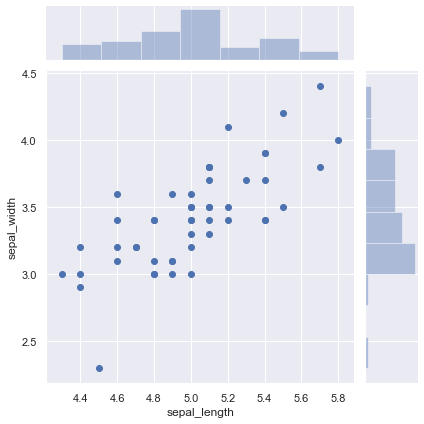

In [50]:
ax=sns.jointplot(x='sepal_length',y='sepal_width',data=setosa)

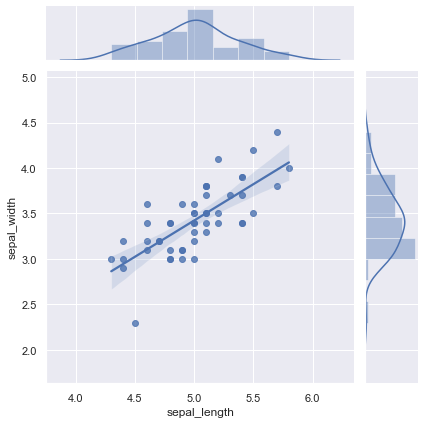

In [51]:
# 将kind参数设置为'reg'，为联合图添加线性回归拟合直线与核密度估计结果：
ax = sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                  kind='reg')

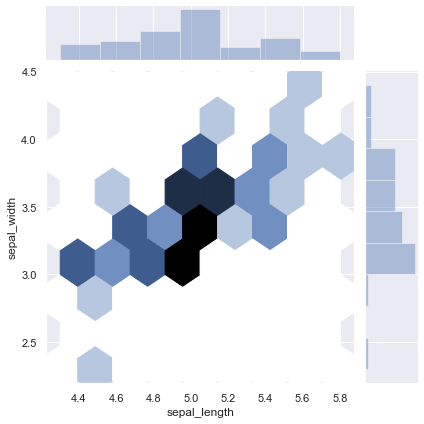

In [52]:
# 修改kind为'hex'来为联合图生成六边形核密度估计
ax = sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                  kind='hex')

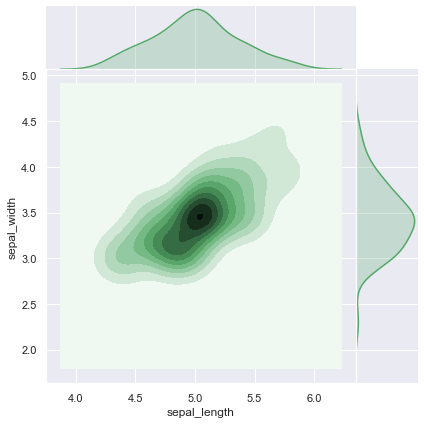

In [53]:
# 修改kind为'kde'来将直方图和散点图转换为核密度估计图，并将边际轴的留白大小设定为0
ax = sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                   kind='kde',
                   space=0,
                   color='g')

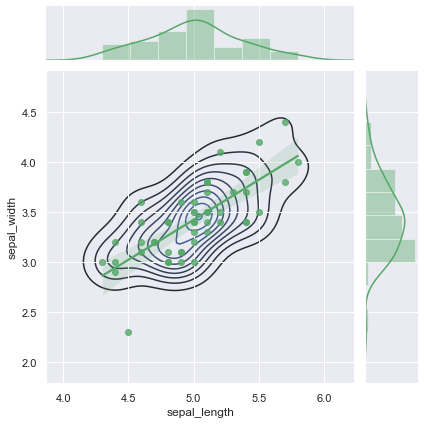

In [54]:
# jointplot还支持图层叠加，如下面的例子，我们首先绘制出的联合图中kind限制
# 为拟合线性回归直线，在此基础上利用.plot_joint方法叠加核密度估计图层
ax = (sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                   color='g',
                   kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

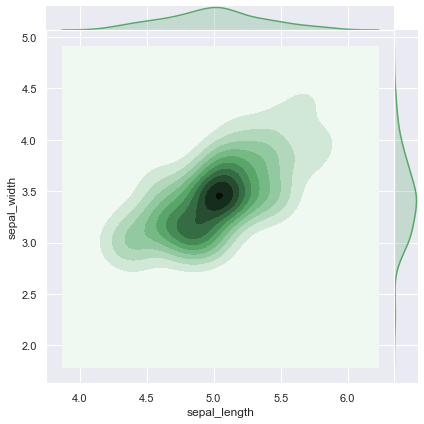

In [55]:
# 调大ratio参数使得边缘图更加小巧
ax = sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                   kind='kde',
                   space=0,
                   color='g',
                   ratio=15)

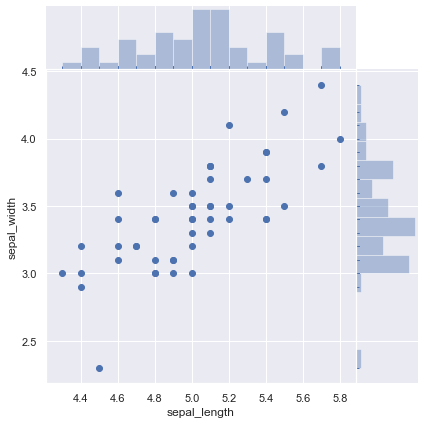

In [56]:
# 利用边缘图形参数字典为边缘图形添加rugplot的内容，并修改直方个数为15
ax = sns.jointplot(x='sepal_length',y='sepal_width',data=setosa,
                   marginal_kws=dict(bins=15, rug=True),
                   linewidth=1,space=0)